In [10]:
import matplotlib as mpl
import numpy as np
from numpy.linalg import norm
from plotting import plot_minutiae, set_plot_datapath, plot_minutia_zoom, plot_features, plot_minutia_compare
#%matplotlib widget
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
datapath = '../data/fvc2002/'
set_plot_datapath(datapath)

# Minutiae

Visualizing the minutiae present in the `mnts` files.

Minutia: `[X, Y, angle, score]`

For each minutia, there is a 196x196 patch, `A{finger}_{sample}_p{patch}`, centered on the position of the respective minutia and oriented by the obtained angle.

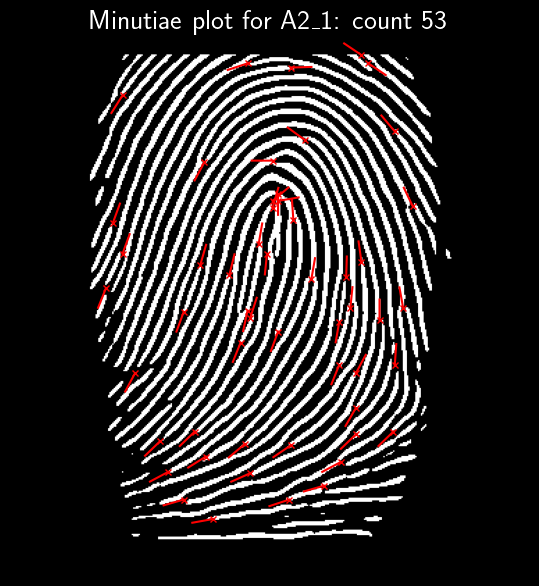

In [11]:
finger = 2
sample = 1

plot_minutiae(finger, sample)

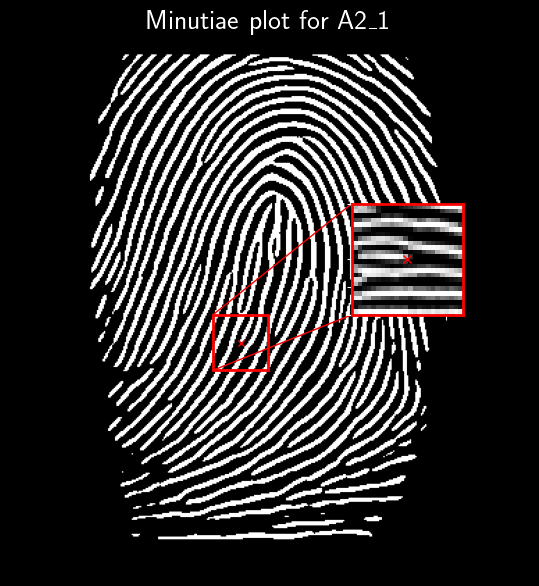

In [12]:
plot_minutia_zoom(finger, sample, minutia_no=8)

# Features

Each of the patches is passed through a convolutional neural network for feature extraction. One way to train the network is using the idea of *contrastive learning*.

- The embedding of each minutia is a vector $\mathbf{z}\in\mathbb{R}^{128}$ and $\|\mathbf{z}\|_2^2 = 1$.
- Each file `features/A{finger}_{sample}.npy` contains a matrix:
  - Each row is a vector associated with a minutia.
  - For each minutia, there is an associated patch in `patches/A{finger}_{sample}_p{patch}.png`.

In [13]:
# Reading features
filename = datapath + f'features/A{finger}_{sample}.npy'
features = np.load(filename)

# 4 minutias embeddings and the first 8 components
np.round(features[0:4, 0:8], 3)

array([[-0.155, -0.006,  0.   ,  0.046,  0.076, -0.039, -0.053,  0.274],
       [-0.045, -0.073, -0.114, -0.015,  0.01 ,  0.005,  0.037, -0.072],
       [-0.176,  0.036,  0.1  , -0.035,  0.037, -0.006, -0.067,  0.17 ],
       [-0.181,  0.031,  0.073, -0.031,  0.045, -0.001, -0.114,  0.112]],
      dtype=float32)

In [14]:
# Feature vector in unitary
v = features[0, :]
print(norm(v))

1.0


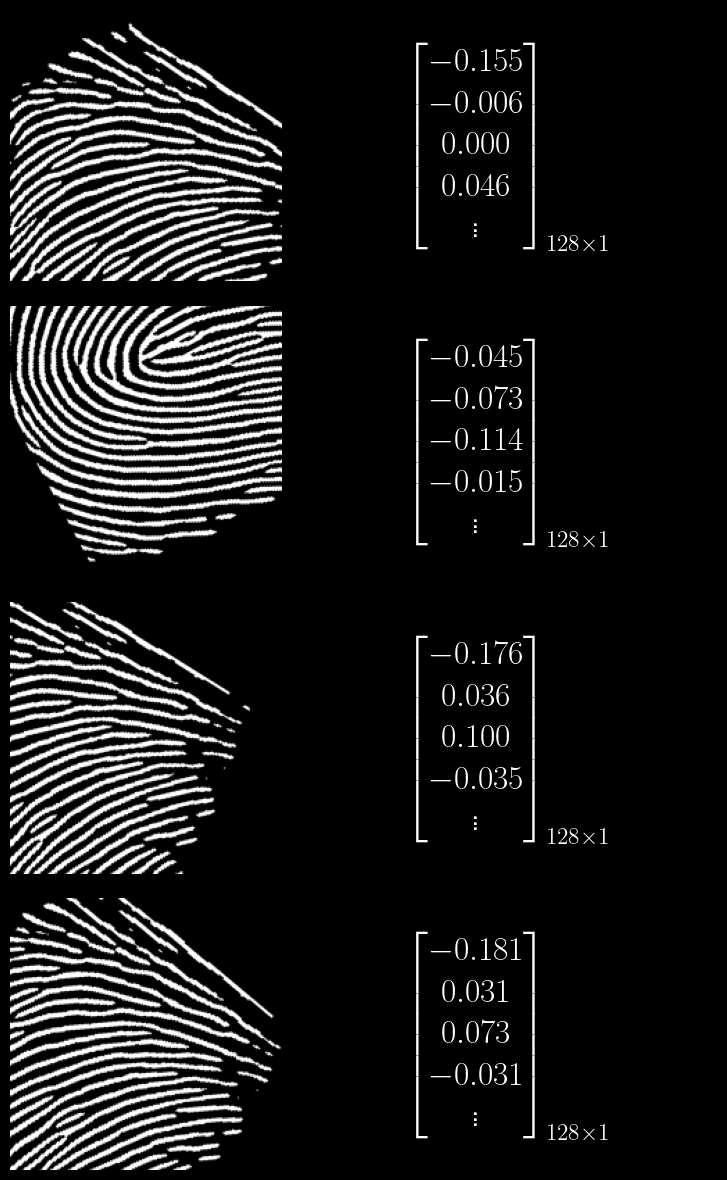

In [15]:
plot_features(finger, sample)

# Similarity

Ideally, the similarity between two embeddings $\mathbf{z}_i$ and $\mathbf{z}_j$ is maximal when the minutia associated with each of them is the same.

The cosine similarity is given by

$$\text{simcos}(\mathbf{z}_i, \mathbf{z}_j) := \frac{\mathbf{z}_i \cdot \mathbf{z}_j}{\|\mathbf{z}_i\|\|\mathbf{z}_j\|}$$

Since the vectors are unitary, $\|\mathbf{z}_i\|$, the formula reduces to the inner product $\text{simcos}(\mathbf{z}_i, \mathbf{z}_j) = \mathbf{z}_i \cdot \mathbf{z}_j$

Thus, given two matrices $\mathcal{F}_1$ with $n_1$ features and $\mathcal{F}_2$ with $n_2$ features.

$$\mathcal{F}_1 = \begin{bmatrix} \mathbf{z}_1^\intercal \\ \mathbf{z}_2^\intercal \\ \vdots \end{bmatrix}_{(n_1 \times 128)}$$

$$\mathcal{F}_2^\intercal = \begin{bmatrix} \mathbf{q}_1 & \mathbf{q}_2 & \cdots \end{bmatrix}_{(128 \times n_2)}$$

$$\mathcal{F}_1\mathcal{F}_2^\intercal = \begin{bmatrix} 
\mathbf{z}_1^\intercal \mathbf{q}_1 & \mathbf{z}_1^\intercal \mathbf{q}_2 & \cdots \\ 
\mathbf{z}_2^\intercal \mathbf{q}_1 & \mathbf{z}_2^\intercal \mathbf{q}_2 & \cdots \\
\vdots & \vdots & \ddots 
\end{bmatrix}$$

Considering unitary vectors

$$\mathcal{F}_1\mathcal{F}_2^\intercal\left[i,j\right] = \mathbf{z}_i^\intercal \mathbf{q}_j = \text{simcos}(\mathbf{z}_i, \mathbf{q}_j)$$

In [16]:
# Pegar dois conjuntos de dados de um mesmo dado
filename = datapath + f'features/A{finger}_{sample}.npy'
features1 = np.load(filename)
filename = datapath + f'features/A{finger}_{sample+1}.npy'
features2 = np.load(filename)

# Computar a similaridade entre todos os embeddings
# Multiplicação de matrizes A[i, j] = sim(zi, qj)
S = features1 @ features2.T

print("features1.shape =", features1.shape)
print("features2.shape =", features2.shape)
print("S.shape =", S.shape)
maxsim = np.unravel_index(np.argmax(S), S.shape)

print(f"MAX: sim(z[{maxsim[0]}], q[{maxsim[1]}]) = {S[maxsim]}")

features1.shape = (53, 128)
features2.shape = (46, 128)
S.shape = (53, 46)
MAX: sim(z[30], q[8]) = 0.9835137724876404


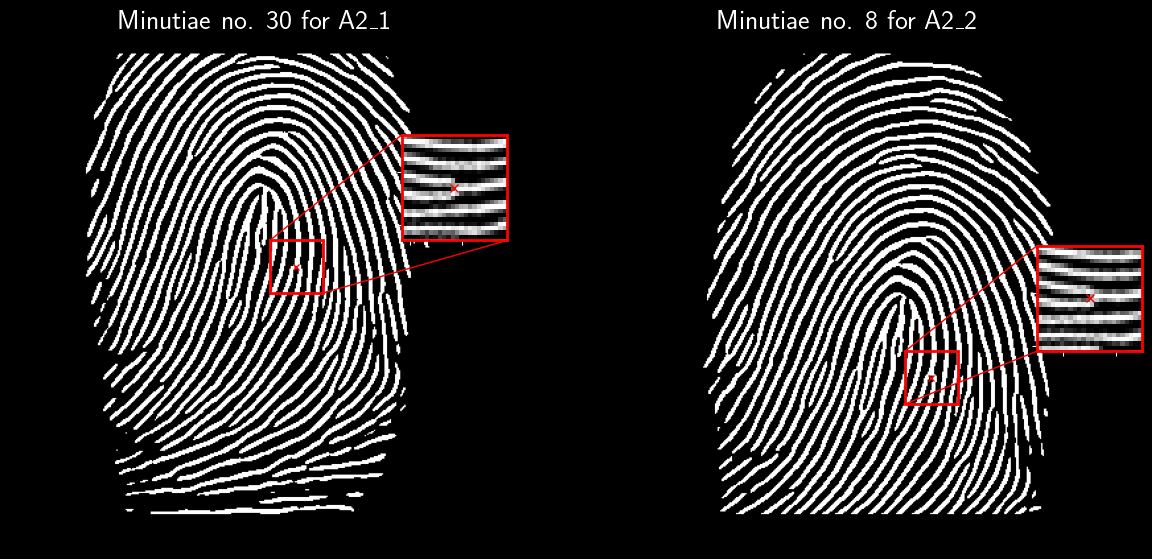

In [17]:
samples = [(finger, sample), (finger, sample+1)]
plot_minutia_compare(samples, maxsim)